In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

df = pd.read_csv('abc company.csv')
print(df[['Height']])


     Height
0    06-Feb
1    06-Jun
2    06-May
3    06-May
4    06-Oct
..      ...
453  06-Mar
454  06-Jan
455  07-Mar
456     7-0
457  07-Mar

[458 rows x 1 columns]


In [8]:
# Preprocessing: replace "Height" column with random values between 150 and 180
df['Height'] = np.random.uniform(150, 180, len(df)).round(2)

print(df[['Height']])

     Height
0    151.94
1    175.53
2    168.23
3    172.96
4    167.88
..      ...
453  177.76
454  151.73
455  160.52
456  176.63
457  168.91

[458 rows x 1 columns]


Team Distribution Percentage:
 Team
New Orleans Pelicans      4.15
Memphis Grizzlies         3.93
Utah Jazz                 3.49
Milwaukee Bucks           3.49
New York Knicks           3.49
Boston Celtics            3.28
Los Angeles Clippers      3.28
Los Angeles Lakers        3.28
Phoenix Suns              3.28
Sacramento Kings          3.28
Brooklyn Nets             3.28
Philadelphia 76ers        3.28
Toronto Raptors           3.28
Golden State Warriors     3.28
Indiana Pacers            3.28
Detroit Pistons           3.28
Cleveland Cavaliers       3.28
Chicago Bulls             3.28
Houston Rockets           3.28
San Antonio Spurs         3.28
Atlanta Hawks             3.28
Dallas Mavericks          3.28
Charlotte Hornets         3.28
Miami Heat                3.28
Denver Nuggets            3.28
Washington Wizards        3.28
Portland Trail Blazers    3.28
Oklahoma City Thunder     3.28
Orlando Magic             3.06
Minnesota Timberwolves    3.06
Name: count, dtype: float64


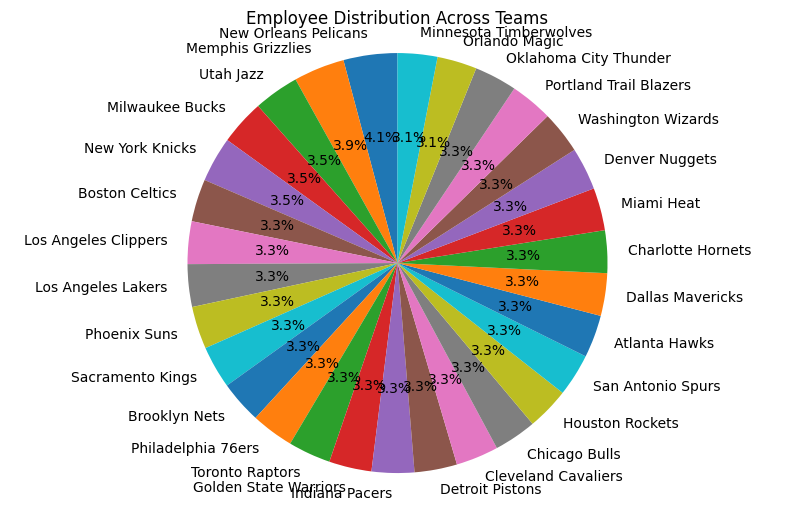

In [10]:
# 1. Team Distribution
team_dist = df['Team'].value_counts()
team_percentages = (team_dist / len(df) * 100).round(2)

print("Team Distribution Percentage:\n", team_percentages)

# Ploting team distribution
plt.figure(figsize=(10, 6))
plt.pie(team_percentages, labels=team_percentages.index, autopct='%1.1f%%', startangle=90)
plt.title('Employee Distribution Across Teams')
plt.axis('equal')
plt.show()


Position Distribution:
 Position
SG    102
PF    100
PG     92
SF     85
C      79
Name: count, dtype: int64


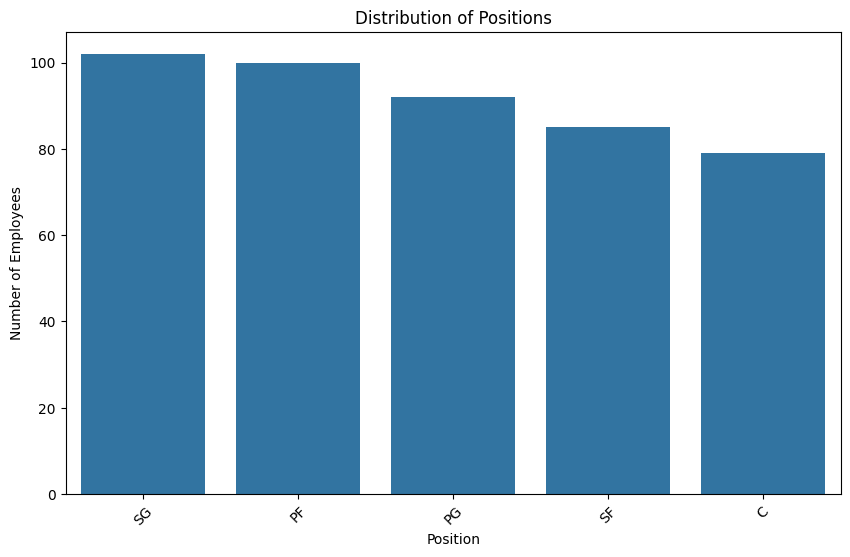

In [12]:
# 2. Position Distribution
position_dist = df['Position'].value_counts()

print("Position Distribution:\n", position_dist)

# Plot position distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=position_dist.index, y=position_dist.values)
plt.title('Distribution of Positions')
plt.xlabel('Position')
plt.ylabel('Number of Employees')
plt.xticks(rotation=45)
plt.show()


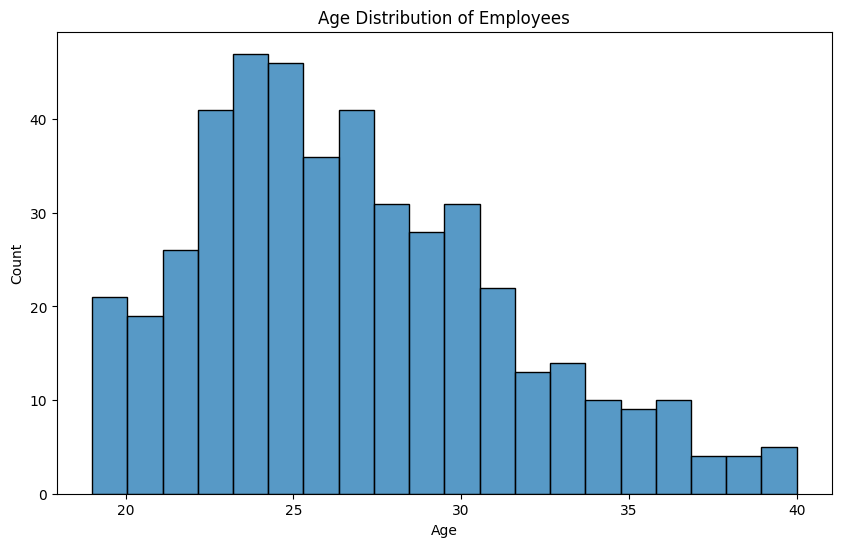

Age Group Distribution:
 age_group
20-30    346
31-40     91
41-50      0
51-60      0
61-70      0
Name: count, dtype: int64

Age group with the highest count: 20-30


In [17]:
# 3. Age Group Analysis
df['age_group'] = pd.cut(df['Age'], bins=[20, 30, 40, 50, 60, 70], labels=['20-30', '31-40', '41-50', '51-60', '61-70'])
age_dist = df['age_group'].value_counts()

# Plot age distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age', bins=20)
plt.title('Age Distribution of Employees')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()
print("Age Group Distribution:\n", age_dist)
highest_age_group = age_dist.idxmax()
print("\nAge group with the highest count:", highest_age_group)

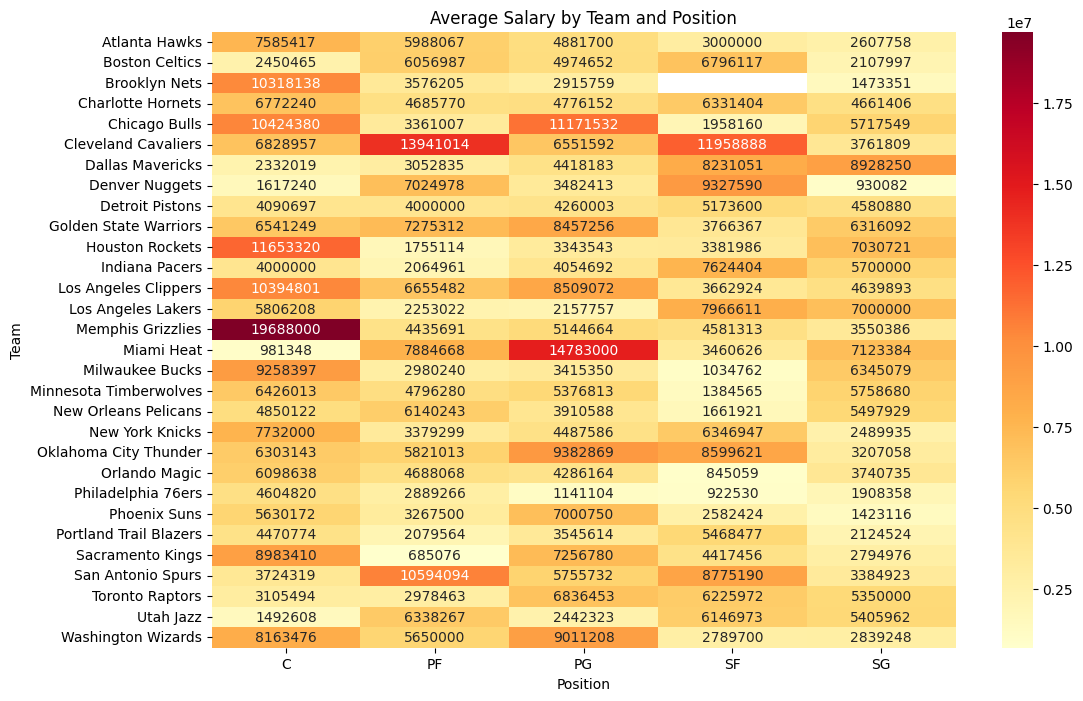

Salary Analysis:
                                      mean         sum
Team               Position                          
Los Angeles Lakers SF        7.966611e+06  31866445.0
Miami Heat         PF        7.884668e+06  31538671.0
Houston Rockets    SG        7.030721e+06  28122883.0
Phoenix Suns       PG        7.000750e+06  28002998.0
Denver Nuggets     SF        9.327590e+06  27982771.0
...                                   ...         ...
                   SG        9.300817e+05   2790245.0
Philadelphia 76ers SF        9.225295e+05   1845059.0
Sacramento Kings   PF        6.850760e+05   1370152.0
Miami Heat         C         9.813480e+05    981348.0
Orlando Magic      SF        8.450590e+05    845059.0

[149 rows x 2 columns]

Team and Position with the highest salary expenditure:
                                    mean         sum
Team               Position                        
Los Angeles Lakers SF        7966611.25  31866445.0


In [16]:
# 4. Salary by Team and Position
salary_analysis = df.groupby(['Team', 'Position'])['Salary'].agg(['mean', 'sum']).sort_values('sum', ascending=False)

# Heatmap for average salary by team and position
pivot_table = df.pivot_table(values='Salary', index='Team', columns='Position', aggfunc='mean')
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, fmt='.0f', cmap='YlOrRd')
plt.title('Average Salary by Team and Position')
plt.show()
print("Salary Analysis:\n", salary_analysis)
highest_salary_expenditure = salary_analysis.head(1)
print("\nTeam and Position with the highest salary expenditure:\n", highest_salary_expenditure)


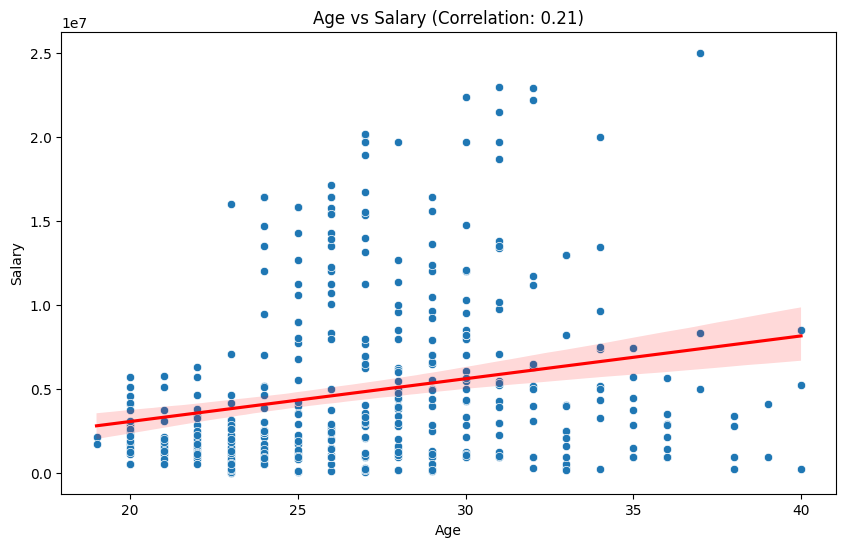

Age-Salary Correlation Coefficient: 0.21, P-value: 0.0000


In [18]:
# 5. Age-Salary Correlation
correlation = stats.pearsonr(df['Age'], df['Salary'].fillna(0))  

# Plot age vs. salary
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Age', y='Salary')
plt.title(f'Age vs Salary (Correlation: {correlation[0]:.2f})')
plt.xlabel('Age')
plt.ylabel('Salary')
sns.regplot(data=df, x='Age', y='Salary', scatter=False, color='red')
plt.show()
print(f"Age-Salary Correlation Coefficient: {correlation[0]:.2f}, P-value: {correlation[1]:.4f}")